#### Problem 1 - Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [1044]:
# Importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set_style('whitegrid')
#sns.set_palette('bright')
from warnings import filterwarnings
filterwarnings('ignore')

Data Dictionary

In [1045]:
dictionary = pd.read_excel('data dictionary cubic zirconia.xlsx')

In [1046]:
dictionary

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconia...
2,Color,Colour of the cubic zirconia.With D being the ...
3,Clarity,Clarity refers to the absence of the Inclusion...
4,Depth,"The Height of cubic zirconia, measured from th..."
5,Table,The Width of the cubic zirconia's Table expres...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


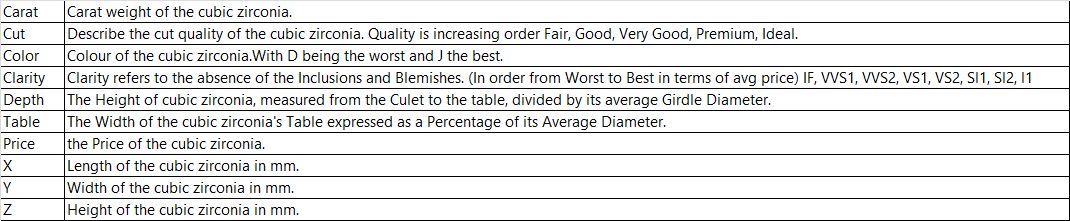

#### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [1047]:
# Importing the dataset
df = pd.read_csv('cubic_zirconia.csv')

In [1048]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [1049]:
df.shape

(26967, 11)

In [1050]:
# Removing the Unnamed column as it is not necessary for our analysis
df.drop('Unnamed: 0', axis=1, inplace=True)

In [1051]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [1052]:
# checking for duplicate values
print('There are',df.duplicated().sum(), 'duplicates in the dataset')

There are 34 duplicates in the dataset


In [1053]:
df.drop_duplicates(inplace=True)

In [1054]:
df.shape

(26933, 10)

In [1055]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [1056]:
df['cut'].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [1057]:
df['color'].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [1058]:
df['clarity'].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [1059]:
# checking for missing values in the dataset
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

depth column has 697 missing values. Let us impute them with Median value of 61.8 so that we do not miss out on the information we have in this dataset. 

#### Summary Statistics

In [1060]:
df.describe(percentiles=[0.25,0.50,0.75,0.80,0.90],include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,80%,90%,max
carat,26933.0,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,1.14,1.51,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26236.0,NaN,NaN,NaN,61.745285,1.412243,50.8,61.0,61.8,62.5,62.7,63.3,73.6
table,26933.0,NaN,NaN,NaN,57.45595,2.232156,49.0,56.0,57.0,59.0,59.0,60.0,79.0
x,26933.0,NaN,NaN,NaN,5.729346,1.127367,0.0,4.71,5.69,6.55,6.72,7.31,10.23
y,26933.0,NaN,NaN,NaN,5.733102,1.165037,0.0,4.71,5.7,6.54,6.71,7.31,58.9
z,26933.0,NaN,NaN,NaN,3.537769,0.719964,0.0,2.9,3.52,4.04,4.14,4.52,31.8
price,26933.0,NaN,NaN,NaN,3937.52612,4022.551862,326.0,945.0,2375.0,5356.0,6342.0,9914.6,18818.0


From the above summary statistics, below are the observations found:

1. Unnamed: 0 column can be removed as it does not add value to the dataset.
2. Mean carat weight of the cubic zirconia is 0.79 with a maximum weight upto 4.5. Seems to be normally distributed.  
3. Most of cut quality of cubic zirconia is "Ideal".
4. Color of the cubic zirconia is most of the times G. 
5. Clarity of cubic zirconia is mostly SI1.
6. The average depth of cubic zirconia is 61.74 with a maximum value of 73.6. This too is likely to be normally distributed.
7. table shows a mean of 57.45 and a median of 57.00 with a maximum value of 79.00. Seems to be normally distributed with a slight skewness. 
8. The average length of cubic zirconia is 5.72mm ranging to a maximum length of 10.23mm. 
9. The average width of cubic zirconia is 5.73mm to a maximum width of 58.9mm.
10. The average height of cubic zirconia is 3.53mm to a maximum height of 31.8mm.
11. The attributes x, y, z have minimum value as 0.00mm. Not sure if this is a valid data input. Need to check with business if these are incorrect data entries or valid measurements. For now we leave it as is. 
12. price variable which is our dependent variable ranges from a minimum of 326.00 to a maximum of 18818.00 with a mean price of 3939.51 to a median price of 2375.00. 90% of the product items are within the price of 9920.40. 

In [1061]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [1062]:
df.drop(df[df['x']==0].index, inplace=True)

In [1063]:
df.drop(df[df['y']==0].index, inplace=True)

In [1064]:
df.drop(df[df['z']==0].index, inplace=True)

In [1065]:
df.shape

(26925, 10)

In [1066]:
df1 = df.copy()
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Exploratory Data Analysis

#### Univariate Analysis

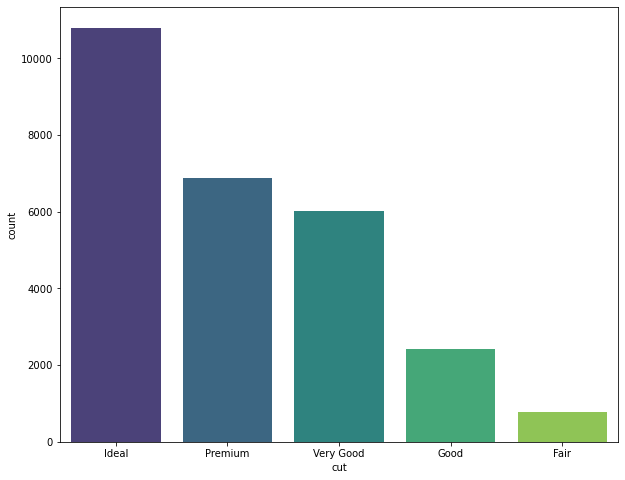

In [1067]:
plt.figure(figsize=(10,8))
sns.countplot(df1['cut'], palette='viridis');

The above count plot shows that Ideal cut diamonds are the maximum in the dataset followed by Premium and Very Good cut. 

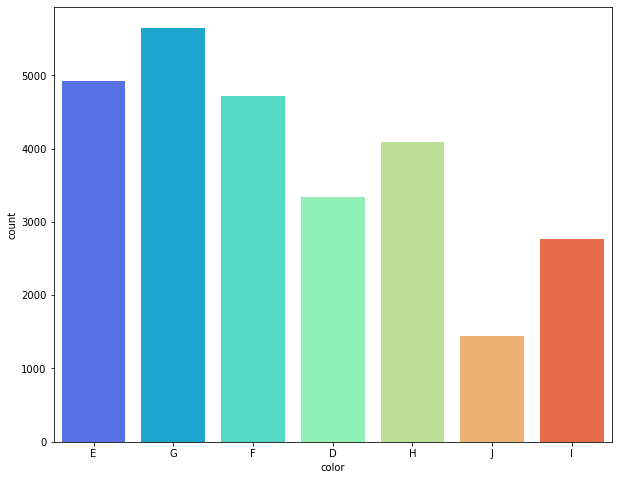

In [1068]:
plt.figure(figsize=(10,8))
sns.countplot(df1['color'], palette='rainbow');

Among the diamond colors, G and E are the maximum. Close to 4900 diamonds are E color category which is very close to worst color. J being the best color is least among the diamonds in the dataset. 

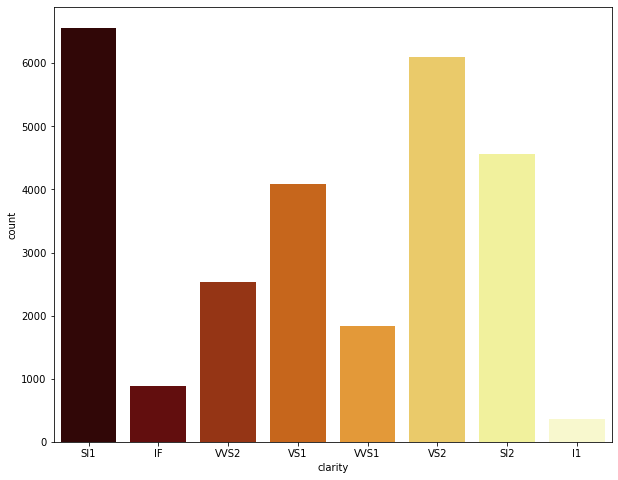

In [1069]:
plt.figure(figsize=(10,8))
sns.countplot(df1['clarity'], palette='afmhot');

When it comes to clarity, SI1 and VS2 are the most predominant diamonds from the dataset. These two are moderately superior clarity. 

<Figure size 1080x576 with 0 Axes>

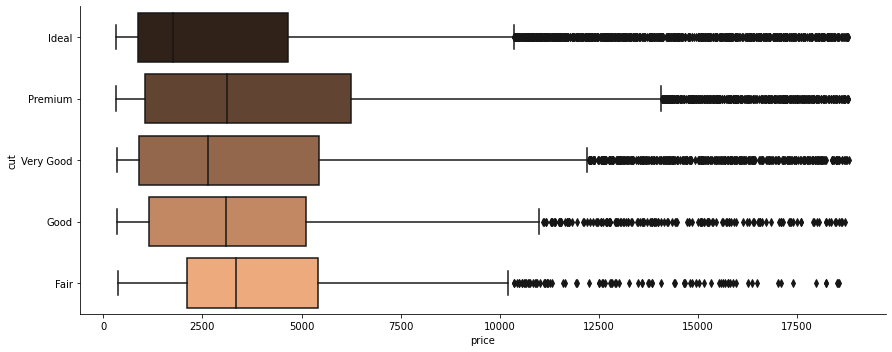

In [1070]:
plt.figure(figsize=(15,8))
sns.catplot(x='price', y='cut', kind='box', data=df1, aspect=2.5, palette='copper');
plt.show()

When compared to price range with diamond cuts, premium cuts are at the higher side however we see a lot of outliers for all types of cuts ranging from Fair to Ideal. 

<Figure size 1080x576 with 0 Axes>

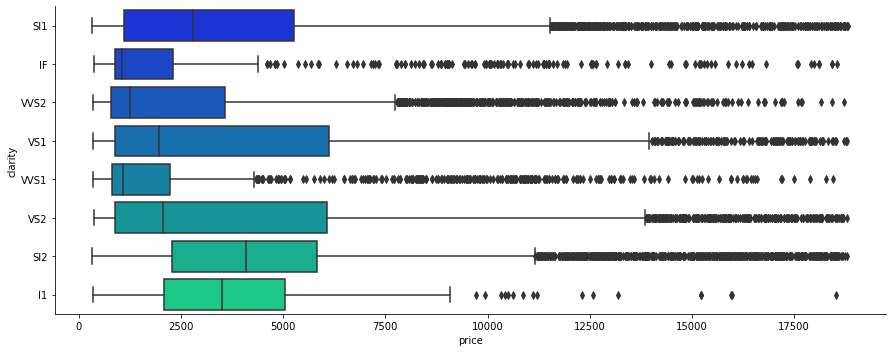

In [1071]:
plt.figure(figsize=(15,8))
sns.catplot(x='price', y='clarity', aspect=2.5, data=df1, kind='box', palette='winter');
plt.show()

With respect to clarity, the price range is higher for VS1 and VS2 however we see a lot of outliers for most of the clarity diamonds. As expected VVS1 which is one of the worst clarity diamonds have the least price range but also lot of outliers. 

<Figure size 1080x576 with 0 Axes>

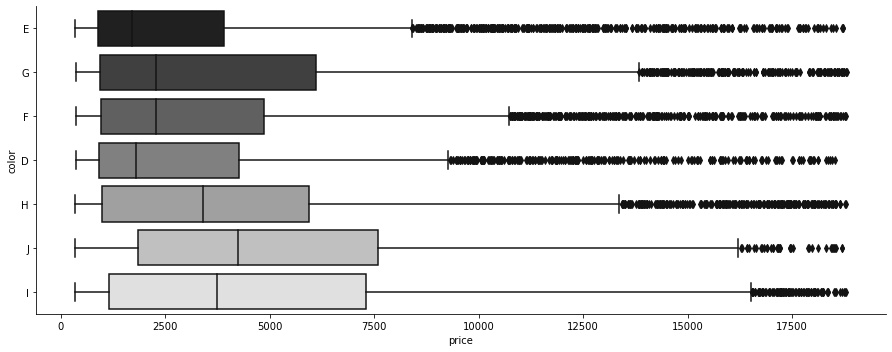

In [1072]:
plt.figure(figsize=(15,8));
sns.catplot(x='price', y='color', data=df1, kind='box', aspect=2.5, palette='gray');
plt.show();

When it comes to color of the diamonds, it very evident that the best color category I and J has higher price range whereas worst colors D and E has lowest price range. Apparently these too have outliers. 

In [1073]:
df.duplicated().sum()

0

In [1074]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26228 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [1075]:
df_numerical = df[['carat','depth','table','x','y','z','price']]
df_numerical

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


#### Box Plots

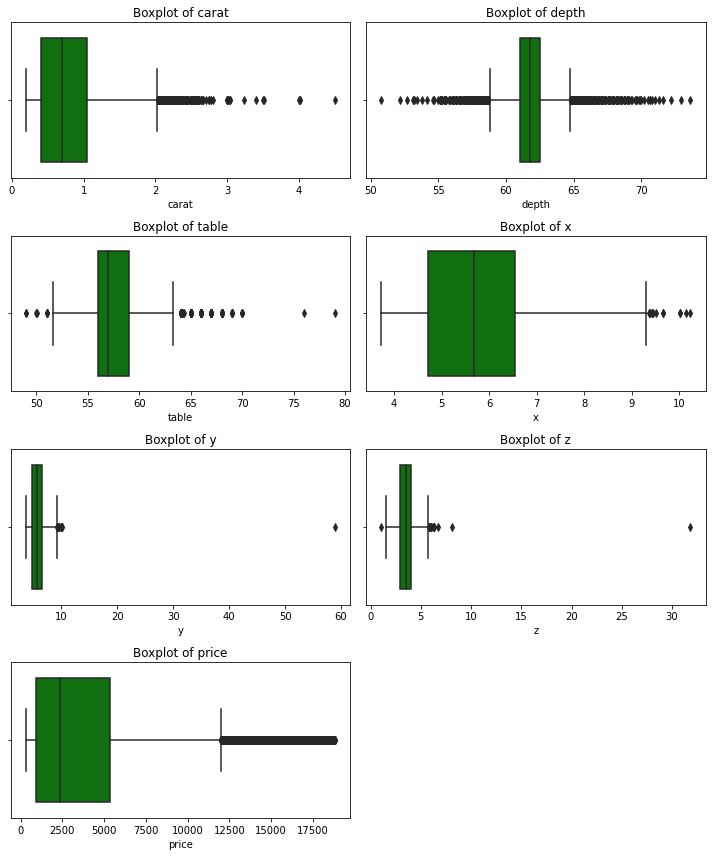

In [1076]:
plt.figure(figsize = (10,12))
feature_list = df_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df_numerical[feature_list[i]], data=df_numerical, orient='h', color='g')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

From the above boxplots, we can see that there are outliers in all the variables. 

#### Distribution Plots

In [1077]:
from scipy.stats import norm

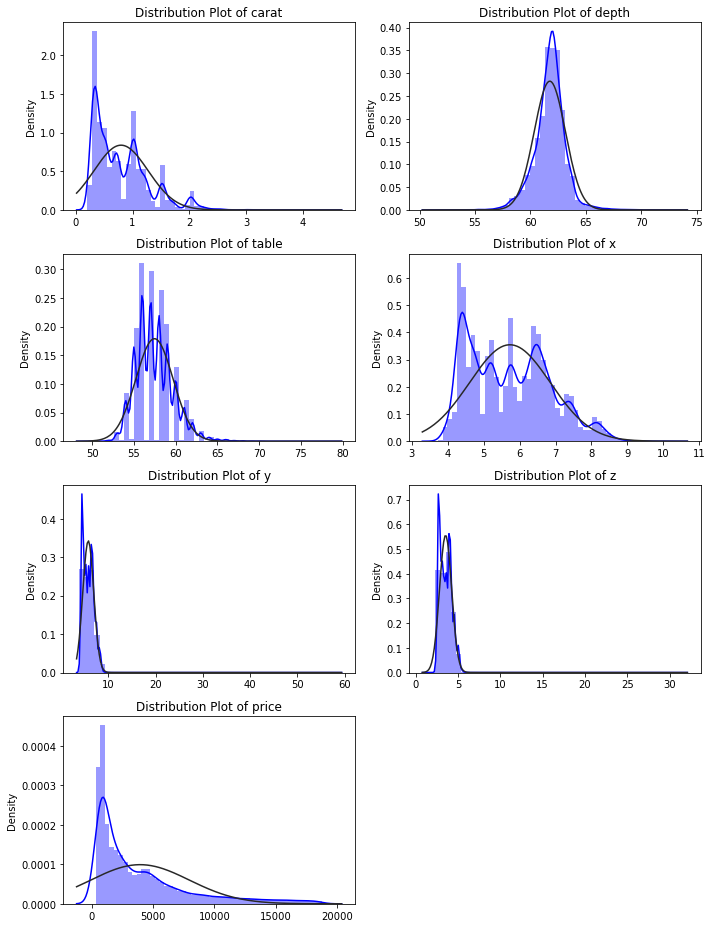

In [1078]:
plt.figure(figsize = (10,13))
feature_list = df_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.distplot(x=df_numerical[feature_list[i]], color='b', fit=norm)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

From the above, distribution plot of depth shows a normal distribution. carat, table, x, y, z and price variables show right skewed distributions. Variable x shows somewhat a normal distribution with multi-modal peaks.

#### Skewness and Kurtosis

In [1079]:
for columns in df_numerical.columns:
    print('Skewness of {} is'.format(columns), round(df_numerical[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(df_numerical[columns].kurt(),2))

Skewness of carat is 1.11
Kurtosis of carat is 1.21
Skewness of depth is -0.03
Kurtosis of depth is 3.69
Skewness of table is 0.76
Kurtosis of table is 1.58
Skewness of x is 0.4
Kurtosis of x is -0.72
Skewness of y is 3.89
Kurtosis of y is 160.73
Skewness of z is 2.64
Kurtosis of z is 88.52
Skewness of price is 1.62
Kurtosis of price is 2.15


#### Bivariate Analysis

#### Pairplot

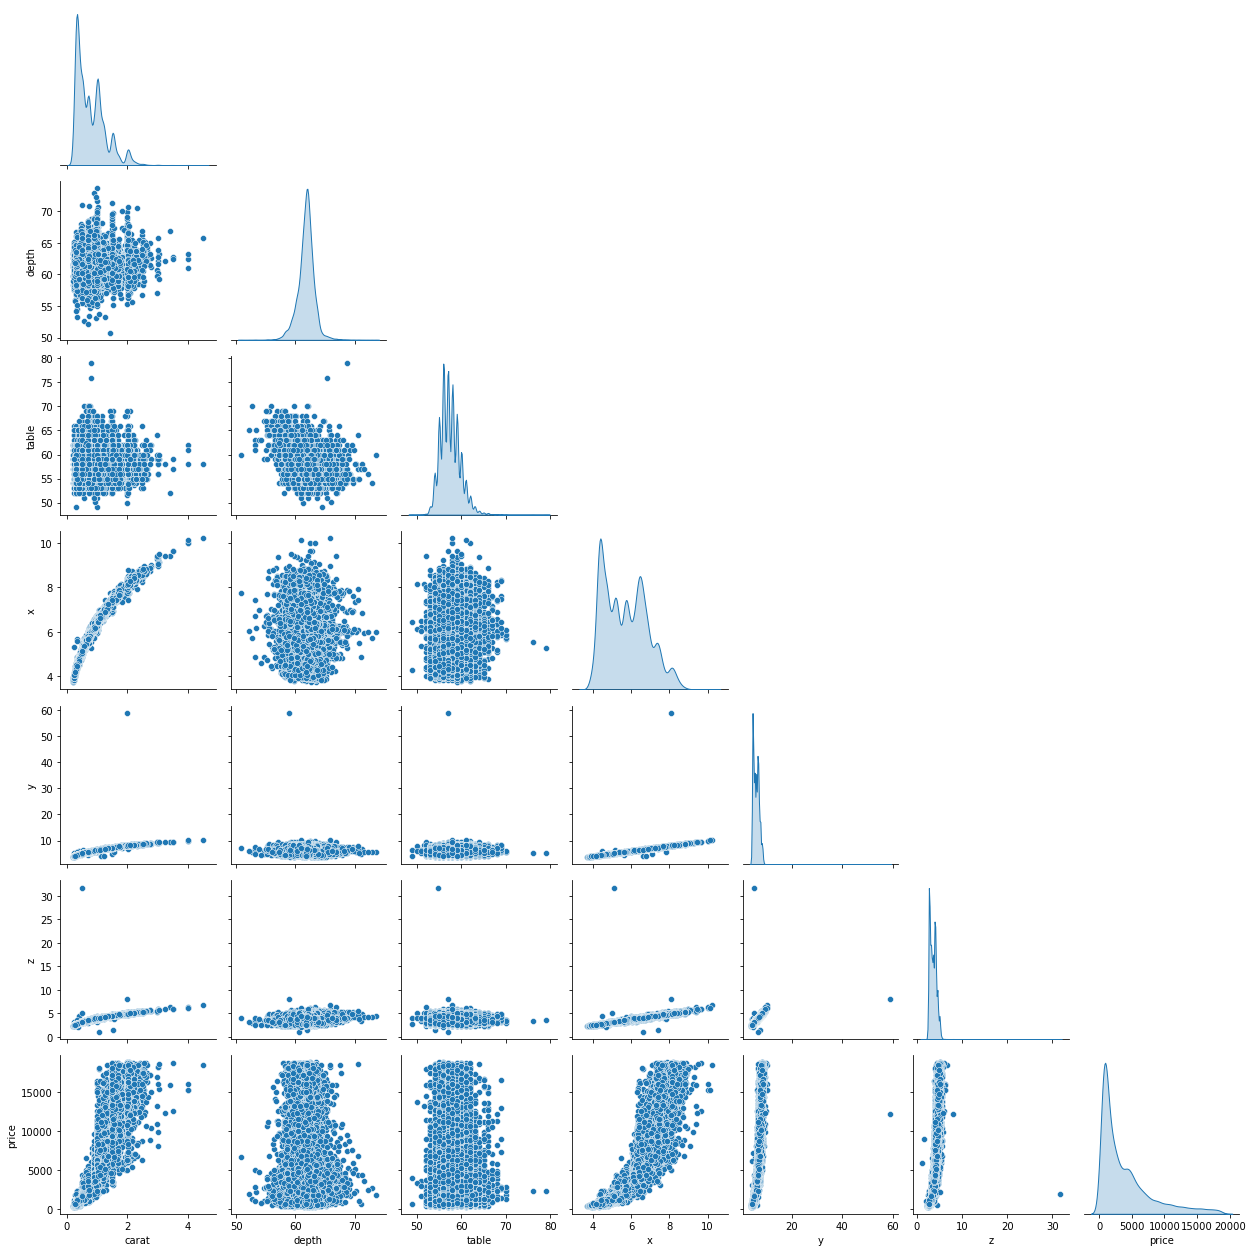

In [1080]:
sns.pairplot(df_numerical, corner=True, diag_kind='kde');
plt.tight_layout()
plt.show()

From the above pairplot we can see that there is a strong positive relationship between carat and price. Similarly x, y and z have a moderately positive correlation with carat. Variables x, y and z themselves seem to have high multicollinearity. However we will also see if this is true when we check the correlation heatmap.  

#### Correlation Heatmap

In [1081]:
corr = df_numerical.corr()
round(corr,2)

,carat,depth,table,x,y,z,price
carat,1.00,0.04,0.18,0.98,0.94,0.95,0.92
depth,0.04,1.00,-0.30,-0.02,-0.02,0.10,-0.00
table,0.18,-0.30,1.00,0.20,0.18,0.15,0.13
x,0.98,-0.02,0.20,1.00,0.96,0.96,0.89
y,0.94,-0.02,0.18,0.96,1.00,0.93,0.86
z,0.95,0.10,0.15,0.96,0.93,1.00,0.86
price,0.92,-0.00,0.13,0.89,0.86,0.86,1.00


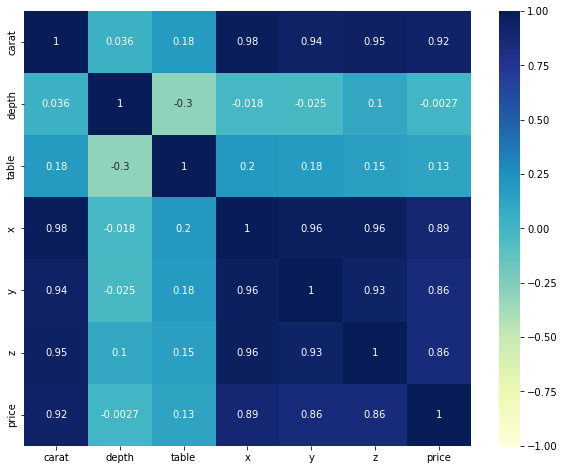

In [1082]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmax=1, vmin=-1);

From the above correlation plot:

1. We can see that x, y and z have high positive correlation with carat. 
2. There is also Multicollinearity between x, y and z variables. 
3. Price and carat have a strong positive correlation with a correlation coefficient of 0.92. 
4. Correlation between x, y and z with price is positive but they are moderate.

Correlation values are always between 1 and -1. Those which are closer to 1 are positively correlated and those which near -1 are negatively correlated. Values near to 0 have no correlation.

#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

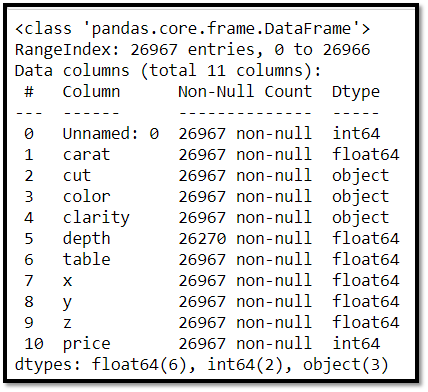

From the earlier info table, we saw that there are 697 Null values in depth column. We are not sure why these are kept blank and since we do not want to lose valuable information from the dataset, we will be imputing the Median value for missing values in depth column.

From the earlier summary statistics table, the attributes x, y, z have minimum value as 0.00mm. They are clear indicators that they have been incorrectly captured as bad data. Its a data input error because there cannot be diamonds with 0.00mm length, width and height. Hence we will be dropping those rows as it is not a significant loss of information. 

In [1083]:
depth_median = df1['depth'].median()
depth_median

61.8

In [1084]:
df['depth'] = df1['depth'].fillna(depth_median)

In [1085]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Post imputing null values, we have Zero missing values in the dataset. 

#### Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

An observation is considered to be an outlier if that particular observation has been mistakenly captured in the data set which we are not sure of at this moment. Treating outliers sometimes results in the models having better performance but the models lose out on generalization. Hence we will not be treating the outliers. We will stick to keeping the outliers as is for now. 

#### Encoding Categorical variables

In [1086]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


We have encoded the categorical variables cut, color and clarity in the ascending order from worst to best since linear regression does not take string variables as parameters into model building. 
Below is the encoding for ordinal values:

CUT: Fair = 1, Good = 2, Very Good = 3, Premium = 4 and Ideal = 5

COLOR: D = 1, E = 2, F = 3, G = 4, H = 5, I = 6 and J = 7

CLARITY = IF = 1, VVS1 = 2, VVS2 = 3, VS1 = 4, VS2 = 5, SI1 = 6, SI2 = 7 and I1 = 8


In [1087]:
df1['cut'].replace(to_replace='Fair', value=1, inplace=True)
df1['cut'].replace(to_replace='Good', value=2, inplace=True)
df1['cut'].replace(to_replace='Very Good', value=3, inplace=True)
df1['cut'].replace(to_replace='Premium', value=4, inplace=True)
df1['cut'].replace(to_replace='Ideal', value=5, inplace=True)

In [1088]:
df1['color'].replace(to_replace='D', value=1, inplace=True)
df1['color'].replace(to_replace='E', value=2, inplace=True)
df1['color'].replace(to_replace='F', value=3, inplace=True)
df1['color'].replace(to_replace='G', value=4, inplace=True)
df1['color'].replace(to_replace='H', value=5, inplace=True)
df1['color'].replace(to_replace='I', value=6, inplace=True)
df1['color'].replace(to_replace='J', value=7, inplace=True)

In [1089]:
df1['clarity'].replace(to_replace='IF', value=1, inplace=True)
df1['clarity'].replace(to_replace='VVS1', value=2, inplace=True)
df1['clarity'].replace(to_replace='VVS2', value=3, inplace=True)
df1['clarity'].replace(to_replace='VS1', value=4, inplace=True)
df1['clarity'].replace(to_replace='VS2', value=5, inplace=True)
df1['clarity'].replace(to_replace='SI1', value=6, inplace=True)
df1['clarity'].replace(to_replace='SI2', value=7, inplace=True)
df1['clarity'].replace(to_replace='I1', value=8, inplace=True)

In [1090]:
df1.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,6,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,3,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65,779
5,1.02,5,1,5,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,2,5,6,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,4,2,6,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,2,5,6,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,5,3,5,60.5,57.0,4.52,4.60,2.76,706


In [1091]:
df1['cut'].value_counts()

5    10805
4     6880
3     6027
2     2434
1      779
Name: cut, dtype: int64

In [1092]:
df1['color'].value_counts()

4    5650
2    4916
3    4722
5    4091
1    3341
6    2765
7    1440
Name: color, dtype: int64

In [1093]:
df1['clarity'].value_counts()

6    6564
5    6092
7    4561
4    4086
3    2530
2    1839
1     891
8     362
Name: clarity, dtype: int64

#### Split the data into Train and Test samples

In [1094]:
df1.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [1095]:
from sklearn.model_selection import train_test_split

In [1096]:
df1.dropna(axis=0, inplace=True)

In [1097]:
y = df1[['price']]
x = df1.drop('price',axis=1)

In [1098]:
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,5,2,6,62.1,58.0,4.27,4.29,2.66
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70
2,0.90,3,2,3,62.2,60.0,6.04,6.12,3.78
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65


In [1099]:
y.head()

,price
0,499
1,984
2,6289
3,1082
4,779


In [1100]:
print(x.shape)
print(y.shape)

(26228, 9)
(26228, 1)


We will split the data into 70:30 train and test samples

In [1101]:
print(x.shape)
print(y.shape)

(26228, 9)
(26228, 1)


In [1102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

#### Multiple Linear Regression using Scikit Learn

#### Model1

In [1103]:
from sklearn.linear_model import LinearRegression

In [1104]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [1105]:
model1.coef_

array([[11349.5032641 ,   122.85592738,  -327.81582057,  -483.90269231,
           88.54902367,   -26.36097639, -1622.12078683,  2372.43936461,
        -2976.89880971]])

In [1106]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model1.coef_[0][idx]))

The coefficient for carat is 11349.503264104516
The coefficient for cut is 122.85592738222738
The coefficient for color is -327.8158205726492
The coefficient for clarity is -483.9026923090329
The coefficient for depth is 88.54902367428247
The coefficient for table is -26.360976385024546
The coefficient for x is -1622.1207868304539
The coefficient for y is 2372.439364606917
The coefficient for z is -2976.898809711562


In [1107]:
model1.intercept_

array([247.15734777])

In [1108]:
model1.score(x_train, y_train)*100

91.11720242118562

In [1109]:
model1.score(x_test, y_test)*100

80.72796927422613

In [1110]:
ytrain_predict = model1.predict(x_train)
ytest_predict = model1.predict(x_test)

In [1111]:
from sklearn.metrics import mean_squared_error, r2_score

In [1112]:
round(mean_squared_error(y_test, ytest_predict),2)

3229430.89

In [1113]:
r2_score(y_test, ytest_predict)

0.8072796927422612

In [1114]:
print(np.sqrt(mean_squared_error(y_test, ytest_predict)))

1797.0617390221653


In [1115]:
print('The co-efficients:', model1.coef_)
print('The intercept:', model1.intercept_)
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, ytest_predict),2))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, ytest_predict)))
print('Co-efficient of Determination (r-square) on the train data:', r2_score(y_train, ytrain_predict))
print('Co-efficient of Determination (r-square) on the test data:', r2_score(y_test, ytest_predict))

The co-efficients: [[11349.5032641    122.85592738  -327.81582057  -483.90269231
     88.54902367   -26.36097639 -1622.12078683  2372.43936461
  -2976.89880971]]
The intercept: [247.15734777]
Mean Squared Error (MSE): 3229430.89
Root Mean Squared Error (RMSE): 1797.0617390221653
Co-efficient of Determination (r-square) on the train data: 0.9111720242118563
Co-efficient of Determination (r-square) on the test data: 0.8072796927422612


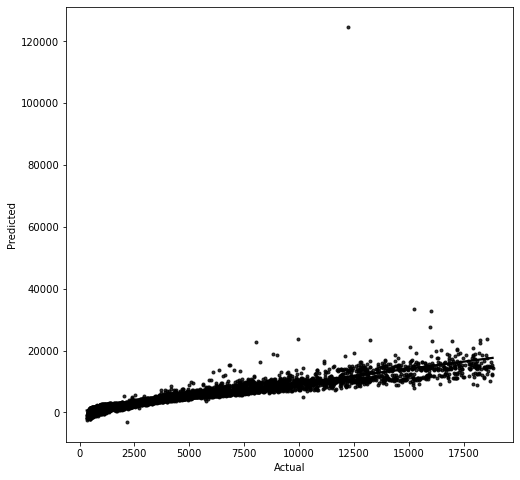

In [1116]:
plt.figure(figsize=(8,8))
sns.regplot(y_test['price'], ytest_predict, color='black', marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Multiple Linear Regression using Stats Model

#### Model2

In [1117]:
import statsmodels.formula.api as smf

In [1118]:
formula = 'price ~ carat+color+clarity+depth+table+x+y+z'

In [1119]:
model2 = smf.ols(formula=formula, data=df1).fit()

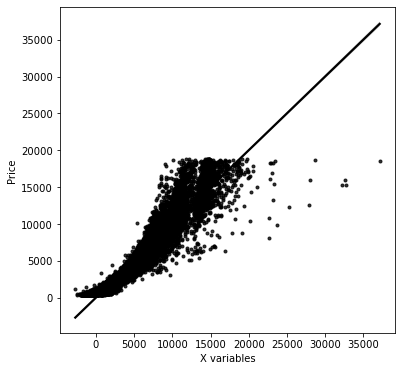

In [1120]:
plt.figure(figsize=(6,6))
sns.regplot(x=model2.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

In [1121]:
print(model2.params)

Intercept    12515.179850
carat        11061.329611
color         -327.998580
clarity       -505.303789
depth          -72.960742
table          -62.796083
x             -530.946899
y               76.699851
z             -850.071653
dtype: float64


In [1122]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 3.215e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:09   Log-Likelihood:            -2.2365e+05
No. Observations:               26228   AIC:                         4.473e+05
Df Residuals:                   26219   BIC:                         4.474e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.252e+04    867.402     14.428      0.0

1.	Dependent variable is “price”.
2.	Model and Method used is Ordinary Least Square (OLS) method which uses mathematical algorithm for linear regression.
3.	No of observations are 26228. 
4.	R-squared value is 0.907 which means 90.7% of the outcome variability is explained by the model. 
5.	Adj. R-squared value is 0.907 which is the correct R-square according to the number of dependent variables.
6.	F-statistic value is used for the calculation of the p-value of the model, Probability (F-statistic) which here is less than 0.05. This also tells us Python is using an ANOVA test which implies an F-distribution.  
7.	Coef shows the coefficients of each dependent variable. 
8.	Std err shows how accurate our coefficient values are. Std err is inversely related to accuracy. Lower the std err signifies higher the accuracy. 
9.	P>|t| is the p-value. This shows how statistically significant each independent variable is on the price (dependent variable). P-value less than 0.05 means they are statistically quite significant. 

#### Model3

In [1123]:
formula = 'price ~ carat+color+clarity+depth+table+x'

In [1124]:
model3 = smf.ols(formula=formula, data=df1).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.284e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:09   Log-Likelihood:            -2.2366e+05
No. Observations:               26228   AIC:                         4.473e+05
Df Residuals:                   26221   BIC:                         4.474e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.554e+04    506.885     30.656      0.0

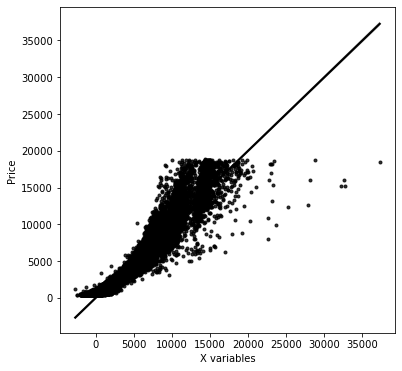

In [1125]:
plt.figure(figsize=(6,6))
sns.regplot(x=model3.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

#### Model4

In [1126]:
formula = 'price ~ carat+x'

In [1127]:
model4 = smf.ols(formula=formula, data=df1).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 7.737e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:11   Log-Likelihood:            -2.2954e+05
No. Observations:               26228   AIC:                         4.591e+05
Df Residuals:                   26225   BIC:                         4.591e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2329.3027    157.139     14.823      0.0

#### Model5

In [1128]:
formula = 'price ~ carat+color+clarity+depth+table'

In [1129]:
model5 = smf.ols(formula=formula, data=df1).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 4.968e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:11   Log-Likelihood:            -2.2407e+05
No. Observations:               26228   AIC:                         4.482e+05
Df Residuals:                   26222   BIC:                         4.482e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9214.3560    463.831     19.866      0.0

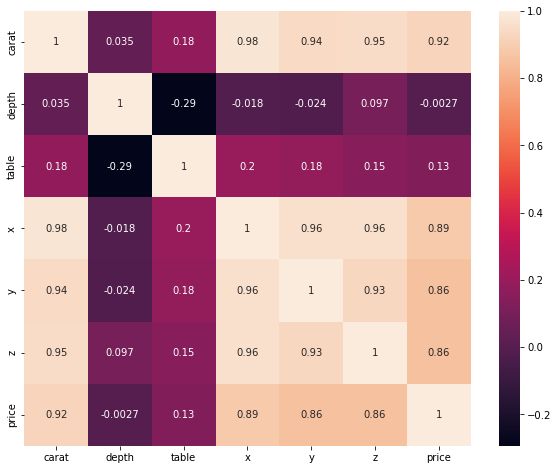

In [1130]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

#### Model6

In [1131]:
formula = 'price ~ carat+x+y+z'

In [1132]:
model6 = smf.ols(formula=formula, data=df1).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 3.946e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:11   Log-Likelihood:            -2.2932e+05
No. Observations:               26228   AIC:                         4.586e+05
Df Residuals:                   26223   BIC:                         4.587e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3212.7753    161.540     19.888      0.0

#### Model7

In [1133]:
formula = 'price ~ carat+cut+color+clarity+depth+table'

In [1134]:
model7 = smf.ols(formula=formula, data=df1).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 4.174e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:11   Log-Likelihood:            -2.2397e+05
No. Observations:               26228   AIC:                         4.480e+05
Df Residuals:                   26221   BIC:                         4.480e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4774.1225    560.998      8.510      0.0

#### Model8

In [1135]:
formula = 'price ~ carat+cut+clarity+depth'

In [1136]:
model8 = smf.ols(formula=formula, data=df1).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 5.208e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:11   Log-Likelihood:            -2.2614e+05
No. Observations:               26228   AIC:                         4.523e+05
Df Residuals:                   26223   BIC:                         4.523e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1832.4253    379.825      4.824      0.0

#### Model9

In [1137]:
formula = 'price ~ carat+cut+color+clarity+depth+table+x+y+z'

In [1138]:
model9 = smf.ols(formula=formula, data=df1).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.880e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:12   Log-Likelihood:            -2.2356e+05
No. Observations:               26228   AIC:                         4.471e+05
Df Residuals:                   26218   BIC:                         4.472e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8467.7960    914.286      9.262      0.0

#### Outlier Treatment

In [1139]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,6,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,3,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65,779


In [1140]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lr = Q1-(1.5 * IQR)
    ur = Q3+(1.5 * IQR)
    return lr,ur

In [1141]:
for column in df1.columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

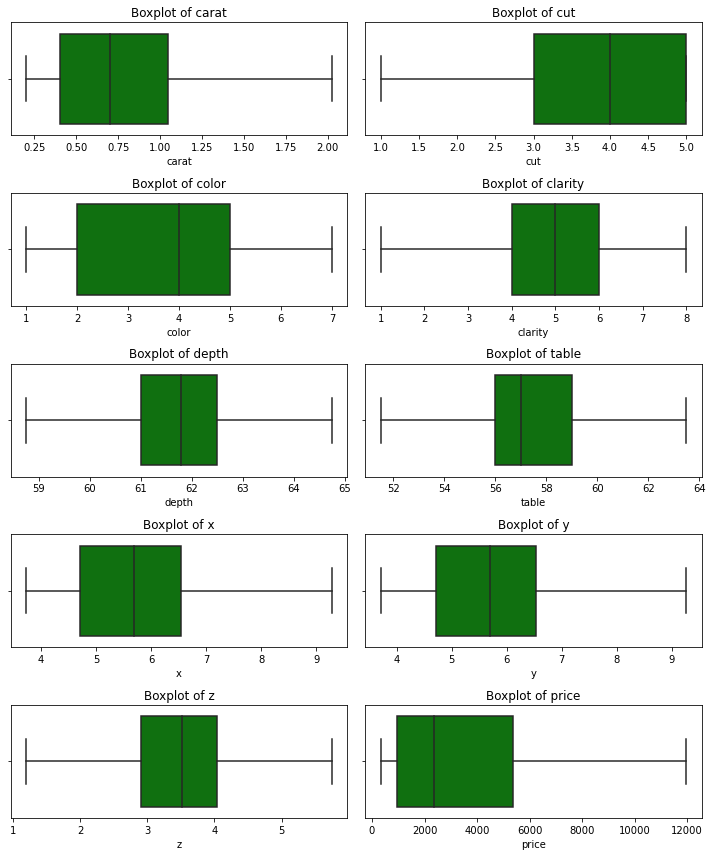

In [1142]:
plt.figure(figsize = (10,12))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=df1[feature_list[i]], data=df, orient='h', color='g')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Linear Regression post Outlier Treatment

In [1143]:
x = df1.drop('price', axis=1)
y = df1[['price']]

In [1144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

#### Model10

In [1145]:
model10 = LinearRegression()
model10.fit(x_train, y_train)

LinearRegression()

In [1146]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model10.coef_[0][idx]))

The coefficient for carat is 8751.300881277873
The coefficient for cut is 107.97604034695344
The coefficient for color is -274.4338929100507
The coefficient for clarity is -431.2570095305264
The coefficient for depth is 91.40613133509609
The coefficient for table is -13.411837851864844
The coefficient for x is -908.6273289854977
The coefficient for y is 1710.6519949538217
The coefficient for z is -1853.0026678045633


In [1147]:
print(model10.intercept_)

[-3428.46391439]


In [1148]:
model10.score(x_train, y_train)*100

93.0585301473453

In [1149]:
model10.score(x_test, y_test)*100

93.23068238888816

In [1150]:
ytest_predict = model10.predict(x_test)

In [1151]:
print(mean_squared_error(y_train, ytrain_predict))

1365380.492130837


In [1152]:
print(np.sqrt(mean_squared_error(y_train, ytrain_predict)))

1168.4949688085255


In [1153]:
print(mean_squared_error(y_test, ytest_predict))

835883.1666864833


In [1154]:
print(np.sqrt(mean_squared_error(y_test, ytest_predict)))

914.2664637218645


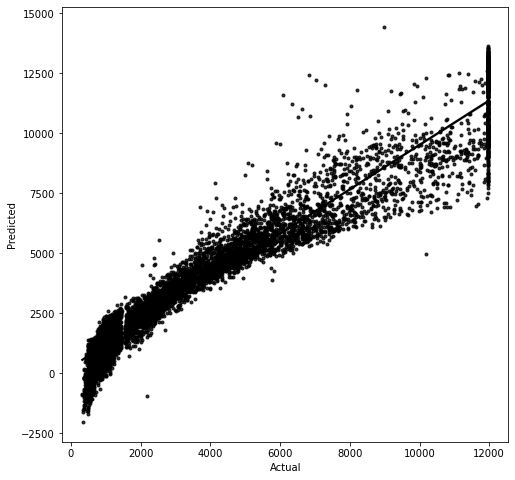

In [1155]:
plt.figure(figsize=(8,8))
sns.regplot(y_test['price'], ytest_predict, color='black', marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Model11

In [1156]:
formula = 'price ~ carat+cut+color+clarity+depth+table+x+y+z'

In [1157]:
model11 = smf.ols(formula=formula, data=df1).fit()
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 3.940e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:15   Log-Likelihood:            -2.1589e+05
No. Observations:               26228   AIC:                         4.318e+05
Df Residuals:                   26218   BIC:                         4.319e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1621.7638    744.123     -2.179      0.0

In [1158]:
model11.params

Intercept   -1621.763763
carat        8828.102820
cut           108.605706
color        -274.386274
clarity      -435.925762
depth          62.842170
table         -12.387698
x           -1066.006623
y            1576.832928
z           -1419.982849
dtype: float64

#### Checking Multicollinearity using Variance Inflation Factor (VIF)

In [1159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1160]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 

In [1161]:
i=0
for column in x.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 124.01621195373215
cut ---> 17.58710826236311
color ---> 6.114473645140826
clarity ---> 12.398816270307671
depth ---> 1261.7699031381692
table ---> 887.9258441321977
x ---> 10722.381239794784
y ---> 9354.51456273367
z ---> 3622.677517683246


Variance Inflation Factor (VIF) is one of the methods to check if independent variables have correlation between them. If they are correlated, then it is not ideal for linear regression models as they inflate the standard errors which in turn affects the regression parameters. As a result, the regression model becomes non-reliable and lacks interpretability. 

General rule of thumb: If VIF values are equal to 1, then that means there is no multicollinearity. If VIF values are equal to 5 or exceedingly more than 5, then there is moderate multicollinearity. If VIF is 10 or more, then that means there is high collinearity. 

From the above we can conclude that variables carat, cut, depth, table, x, y and z have high multicollinearity whereas variable color and clarity has moderate correlation. However variables cut, color and clarity are categorical variables which are transformed to numerical using encoding. Hence it is difficult to say whether the VIF values indicate the right results. 

In [1162]:
for i,j in np.array(model11.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1621.76) * Intercept + (8828.1) * carat + (108.61) * cut + (-274.39) * color + (-435.93) * clarity + (62.84) * depth + (-12.39) * table + (-1066.01) * x + (1576.83) * y + (-1419.98) * z + 

#### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

#### Model Comparison

From the above combination of different dependent variables, we have the below R-squared values for each combination. Based on the R-squared values, we will go with the stats_model with formula price = carat+cut+color+clarity+depth+table+x+y+z for price prediction as 91.00% of the price is explained by the dependent variables. 

In [1163]:
model_performance = pd.read_excel('Linear Regression Model Performance.xlsx')
model_performance

,Model Basis,Model No,Package,Outlier Treatment,Formula,R-squared,Adjusted R-square,Mean Squared Error (MSE),Root Mean Squared Error (RMSE)
0,sklearn,model10,sklearn,Yes,price ~ carat+cut+color+clarity+depth+table+x+y+z,0.930,NaN,835883.17,914.27
1,stats_model,model11,stats model,Yes,price ~ carat+cut+color+clarity+depth+table+x+y+z,0.930,0.930,NaN,NaN
2,stats_model,model2,stats model,No,price ~ carat+color+clarity+depth+table+x+y+z,0.910,0.910,NaN,NaN
3,stats_model,model3,stats model,No,price ~ carat+color+clarity+depth+table+x,0.910,0.910,NaN,NaN
4,stats_model,model9,stats model,No,price ~ carat+cut+color+clarity+depth+table+x+y+z,0.910,0.910,NaN,NaN
5,stats_model,model5,stats model,No,price ~ carat+color+clarity+depth+table,0.900,0.900,NaN,NaN
6,stats_model,model7,stats model,No,price ~ carat+cut+color+clarity+depth+table,0.900,0.900,NaN,NaN
7,stats_model,model8,stats model,No,price ~ carat+cut+clarity+depth,0.890,0.890,NaN,NaN
8,stats_model,model6,stats model,No,price ~ carat+x+y+z,0.856,0.856,NaN,NaN
9,stats_model,model4,stats model,No,price ~ carat+x,0.850,0.850,NaN,NaN


#### Linear Regression Formula

###### Price (y) = (-1621.76) * Intercept + (8828.1) * carat + (108.61) * cut + (-274.39) * color + (-435.93) * clarity + (62.84) * depth + (-12.39) * table + (-1066.01) * x + (1576.83) * y + (-1419.98) * z

#### Business Insights and Recommendations

1.	Model11 and Model10 has performed better after treating outliers.
2.	The highest R-squared is 93.00% which we achieved by using stats_model post outlier treatment. 
3.	We can see that there is high multicollinearity in the dataset. 
4.	Intercept of the model is -1621.76.
5.	R-squared 93.00% shows a good accuracy which means 93% of the price is explained by the model. 
6.	RMSE on training data is 1168.49 and RMSE on testing data is 914.26. 
7.	As per the above graph there is a strong linear relationship between the actual and predicted values with some noise to an extent which signifies the unexplained variance. 
8.	As per our model carat, cut, color, clarity, depth, table, x, y and z are the best attributes to influence price. For 1 unit increase in carat the price of cubic zirconia increases by 8828.1 USD provided the other coefficients are constant. Similarly for 1 unit increase in y the price increases by 1576.83 USD keeping the other coefficients constant. The same analogy applies to all the other coefficients. 
9.	Increase in carat weight of the diamond will increase the price of the diamond considerably. 
10.	Width (y) of the diamond in mm also plays an important factor. As the width increases the price also increases. 
11.	Brighter the color of the diamond, the price increases. 
12.	Gem Stones Ltd should work on carat, color and width of the diamonds which are strong contributors for price. 
13.	Since x, y and z had zero values we have removed them as they are clear indicators that they have been incorrectly captured as bad data. Its a data input error because there cannot be diamonds with 0.00mm length, width and height.  
14.	Gem Stones Ltd can collect more data in future which helps in building more robust models for price prediction. For now model11 and model10 is good for price prediction. If Gem Stones Ltd wants to use the model without outlier treatment, they can as well use the Model2 which predicts the price 91.00% accurately. 

#### ------HAPPY LEARNING---------